## Overview of Transformed Data

In [3]:
# Single import for everything you need
from src.notebook_setup import *
from src.preprocessing.data_preprocessor import *
from src.model_development.model_development import *
import warnings
import copy
warnings.filterwarnings("ignore")

aggressive_gmm_data = pd.read_csv('../data/cached/train_data_aggressive_transformed.csv').dropna()
robust_gmm_data = pd.read_csv('../data/cached/train_data_robust_transformed.csv').dropna()

features_dict = {
    "full_features_aggressive_transformed": [
        'age_at_ed_ss',
        'temperature_ss',
        'temp_delta_ss',
        'heartrate_ss',
        'resprate_bx',
        'o2sat_ibx',
        'sbp_bx',
        'dbp_bx',
        'pain_bx',
        'map_bx',
        'pulse_pressure_bx',
        'shock_index_bx',
        'rate_pressure_product_bx'
    ],
    "cv_features_aggressive_transformed": [
        'age_at_ed_ss',
        'heartrate_ss',
        'sbp_bx',
        'dbp_bx',
        'map_bx',
        'pulse_pressure_bx',
        'shock_index_bx',
        'rate_pressure_product_bx'
    ],
    "full_features_robust_transformed": [
        'age_at_ed_rb',
        'temperature_rb',
        'temp_delta_rb',
        'heartrate_rb',
        'resprate_rb',
        'o2sat_rb',
        'sbp_rb',
        'dbp_rb',
        'pain_rb',
        'map_rb',
        'pulse_pressure_rb',
        'shock_index_rb',
        'rate_pressure_product_rb'
    ],
    "cv_features_robust_transformed": [
        'age_at_ed_rb',
        'heartrate_rb',
        'sbp_rb',
        'dbp_rb',
        'map_rb',
        'pulse_pressure_rb',
        'shock_index_rb',
        'rate_pressure_product_rb'
    ]
}

In [2]:

# # DataExplorer.plot_features_distribution(aggressive_gmm_data, FEATURE_SETS['aggressive_gmm_features'])
# # aggressive_gmm_data.describe().T

# DataExplorer.plot_features_distribution(robust_gmm_data, FEATURE_SETS['robust_gmm_features'])
# robust_gmm_data.describe().T

## Methodology

In [ ]:

# Sample the data
features = features_dict['full_features_aggressive_transformed']
umap_data_aggressive_transformed = aggressive_gmm_data[features].sample(5000)

# Parameter Grid
n_neighbors_options = [5, 10, 25, 50, 100]
min_dist_options = [0.01, 0.025, 0.05, 0.1, 0.25]

# Instantiate the model
umap_model = UMAPClusteringModel()

# Plot the UMAP parameter grid for a subset of features
embeddings = umap_model.plot_umap_parameter_grid(
    scaled_data=umap_data_aggressive_transformed,
    features=features,
    title='UMAP Parameter Grid with Scaled Features'
)

In [ ]:


# Feautres for UMAP
features = features_dict['cv_features_aggressive_transformed']

# Sample the data
umap_data_aggressive_transformed = aggressive_gmm_data[features].sample(5000)


# Parameter Grid
n_neighbors_options = [5, 10, 25, 50, 100]
min_dist_options = [0.01, 0.025, 0.05, 0.1, 0.25]

# Instantiate the model
umap_model = UMAPClusteringModel()

# Plot the UMAP parameter grid for a subset of features
embeddings = umap_model.plot_umap_parameter_grid(
    scaled_data=umap_data_aggressive_transformed,
    features=features,
    title='UMAP Parameter Grid with Cardiovascular Features'
)

In [ ]:

# Feaure Selection
features = features_dict['full_features_robust_transformed']

# Sample the data
umap_data_robust_transformed = robust_gmm_data[features].sample(5000)



# Parameter Grid
n_neighbors_options = [5, 10, 25, 50, 100]
min_dist_options = [0.01, 0.025, 0.05, 0.1, 0.25]

# Instantiate the model
umap_model = UMAPClusteringModel()

# Plot the UMAP parameter grid for a subset of features
embeddings = umap_model.plot_umap_parameter_grid(
    scaled_data=umap_data_robust_transformed,
    features=features,
    title='UMAP Parameter Grid with Cardiovascular Features')

In [ ]:

features = features_dict['cv_features_robust_transformed']  
# Sample the data
umap_data_robust_transformed = robust_gmm_data[features].sample(5000)



# Parameter Grid
n_neighbors_options = [5, 10, 25, 50, 100]
min_dist_options = [0.01, 0.025, 0.05, 0.1, 0.25]

# Instantiate the model
umap_model = UMAPClusteringModel()

# Plot the UMAP parameter grid for a subset of features
embeddings = umap_model.plot_umap_parameter_grid(
    scaled_data=umap_data_robust_transformed,
    features=features,
    title='UMAP Parameter Grid with Cardiovascular Features')

## Gausian Mixture Models 

For full transparency, the results reported in our report were generated from an initial run without a specified random seeds.
While the findings and conclusions remain valid, exact numerical reproduction is not possible.


Fitting GMM model with aggressive transformation with full features


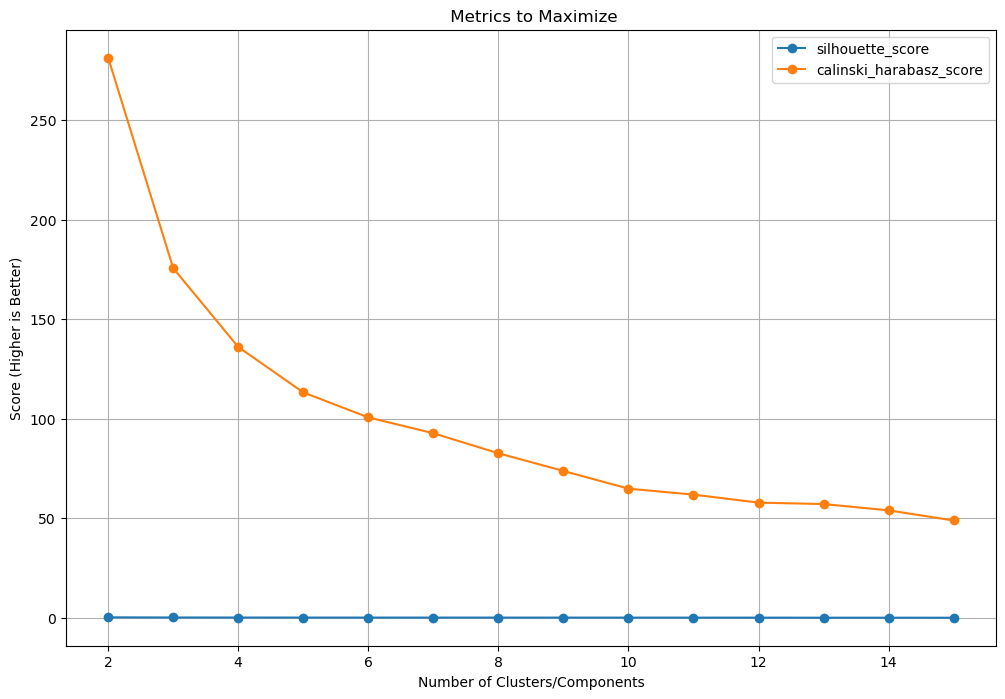

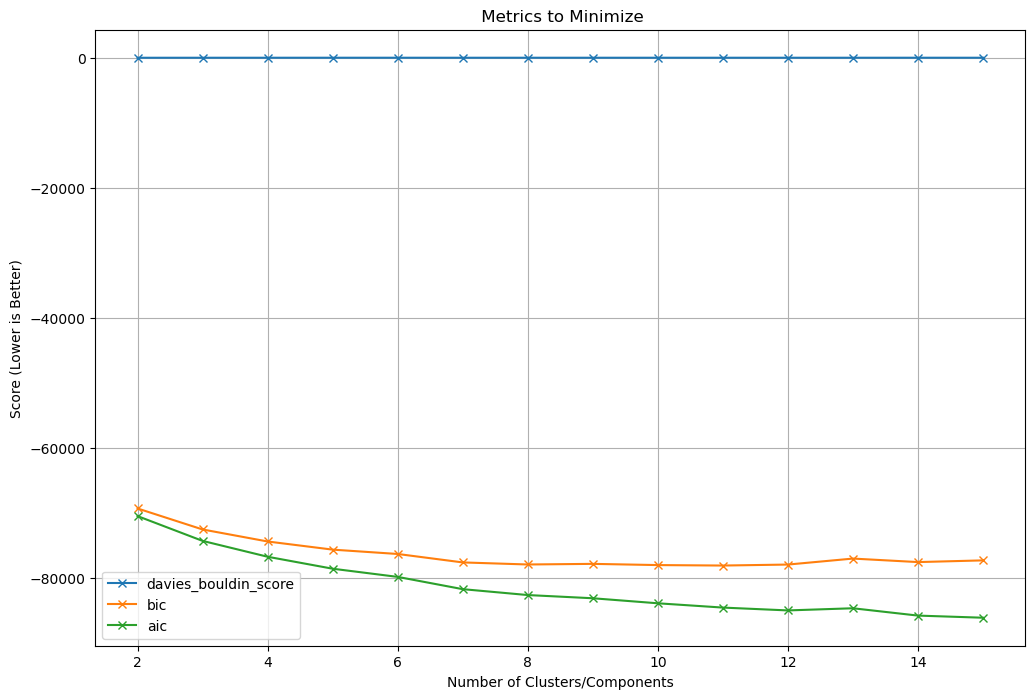

Fitting GMM model with robust transformation with full features


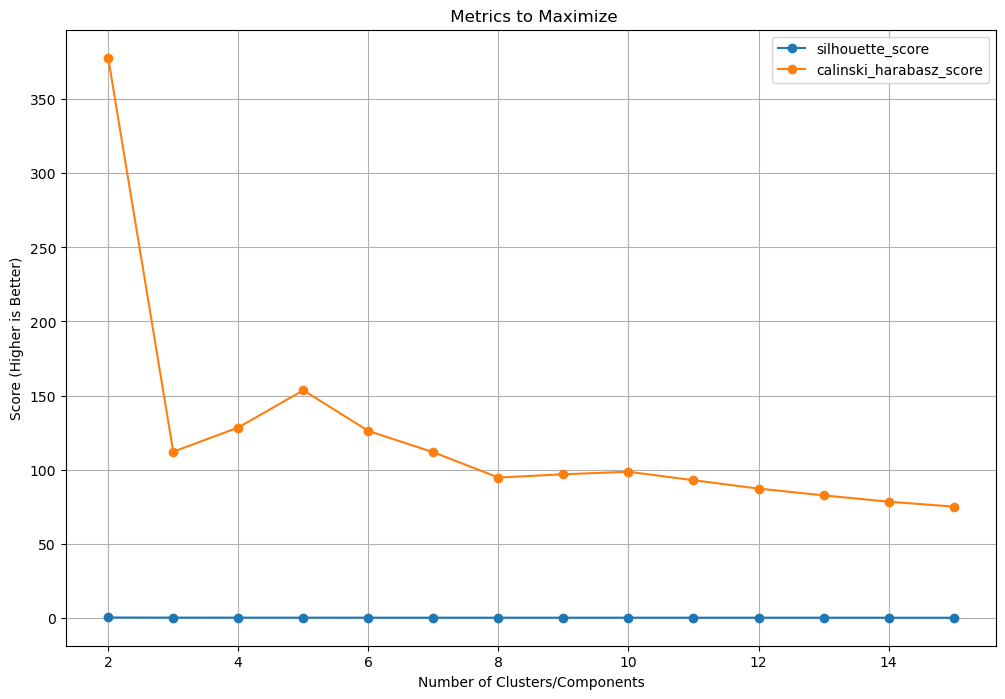

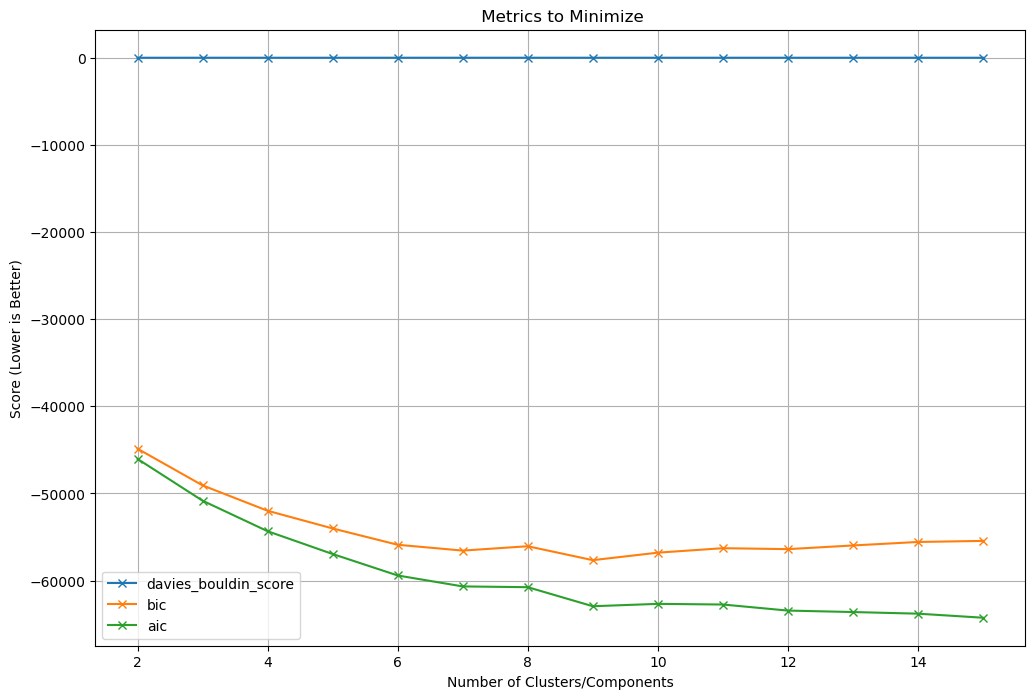

Fitting GMM model with aggressive transformation on focused cardiovascular features


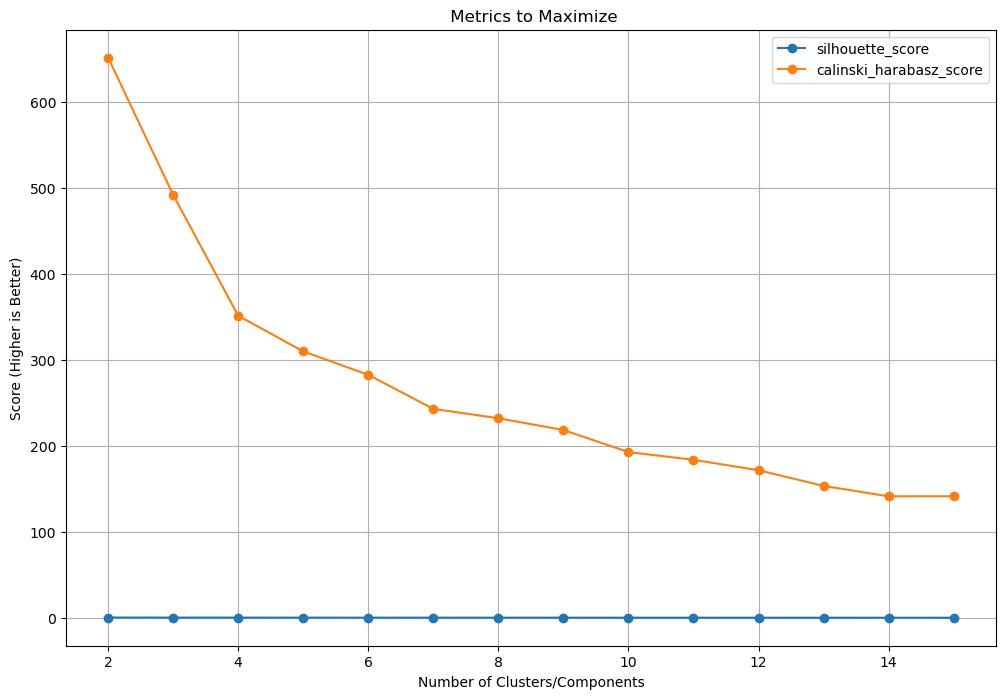

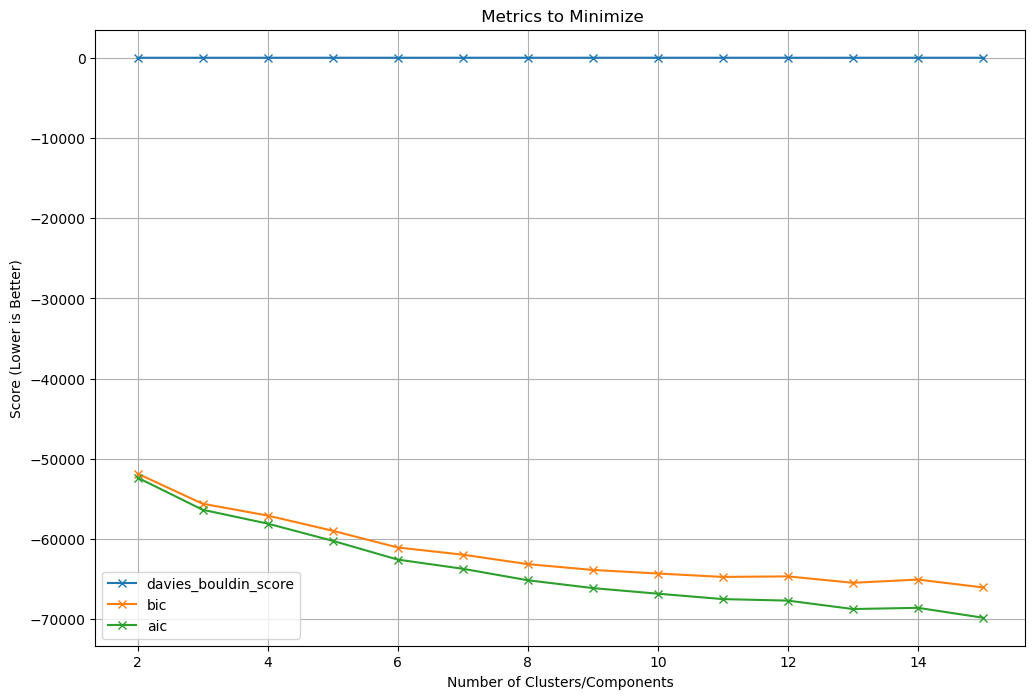

Fitting GMM model with robust transformation on focused cardiovascular features


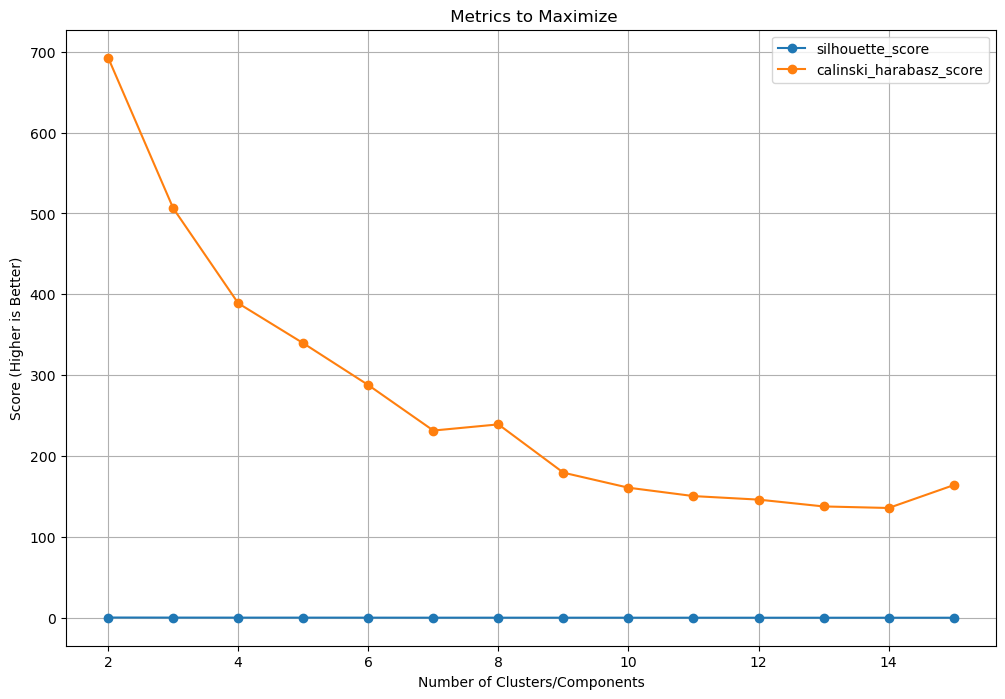

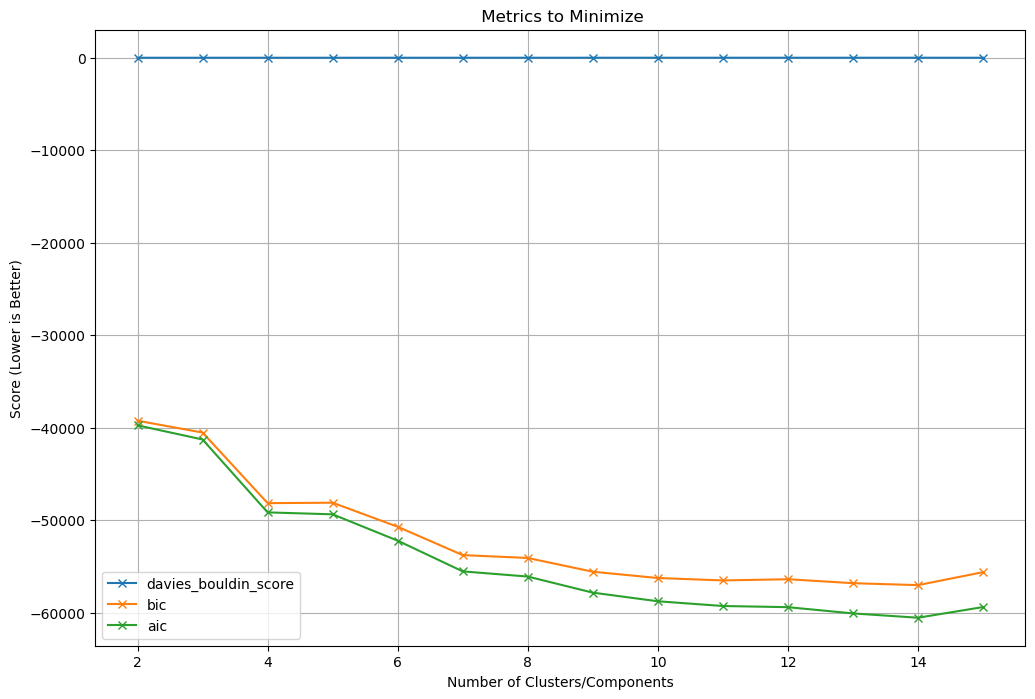

In [4]:
'''
For full transparency, the results reported in our report were generated from an initial run without a specified random seeds.
While the findings and conclusions remain valid, exact numerical reproduction is not possible.
'''

# Drop missing values and a subsample from the dataset
n_samples = 2000

gmm_full_aggressive_transformed = aggressive_gmm_data[features_dict['full_features_aggressive_transformed']].dropna().sample(n_samples)
gmm_cv_aggressive_transformed = aggressive_gmm_data[features_dict['cv_features_aggressive_transformed']].dropna().sample(n_samples)
gmm_full_robust_transformed = robust_gmm_data[features_dict['full_features_robust_transformed']].dropna().sample(n_samples)
gmm_cv_robust_transformed = robust_gmm_data[features_dict['cv_features_robust_transformed']].dropna().sample(n_samples)
# Define the range of components to test for the GMM
component_range = range(2, 16)

# Create a common parameter grid template
param_grid_template = {
    'n_components': list(component_range),
    'random_state': 42,
    'covariance_type': 'full',
    'max_iter': 100
}

# Create the clustering pipeline
pipeline = ClusteringPipeline()

# Define experiment configurations
experiments = [
    {
        'name': 'aggressive transformation with full features',
        'data': gmm_full_aggressive_transformed,
        'base_model_id': 'aggressive_gmm'
    },
    {
        'name': 'robust transformation with full features',
        'data': gmm_full_robust_transformed,
        'base_model_id': 'robust_full'
    },
    {
        'name': 'aggressive transformation on focused cardiovascular features',
        'data': gmm_cv_aggressive_transformed,
        'base_model_id': 'aggressive_cv'
    },
    {
        'name': 'robust transformation on focused cardiovascular features',
        'data': gmm_cv_robust_transformed,
        'base_model_id': 'robust_cv'
    }
]

# Run all experiments
model_ids_by_experiment = {}
for experiment in experiments:
    print(f"Fitting GMM model with {experiment['name']}")
    # Create a fresh copy of the parameter grid for each experiment
    param_grid = copy.deepcopy(param_grid_template)
    model_ids = pipeline.run_experiment(
        model_class=GMMClusteringModel,
        param_grid=param_grid,
        data=experiment['data'],
        param_name='n_components',
        base_model_id=experiment['base_model_id']
    )
    model_ids_by_experiment[experiment['base_model_id']] = model_ids

In [5]:

# Optional: Compare the best models based on silhouette score
best_models = pipeline.registry.compare_models(metric_name='silhouette_score').head(10)
print("Top 10 models by silhouette score:")
print(best_models)


Top 10 models by silhouette score:
                         model_id  silhouette_score
42       robust_cv_n_components_2          0.237318
28   aggressive_cv_n_components_2          0.210634
14     robust_full_n_components_2          0.156728
43       robust_cv_n_components_3          0.151357
0   aggressive_gmm_n_components_2          0.123108
29   aggressive_cv_n_components_3          0.121533
44       robust_cv_n_components_4          0.106999
45       robust_cv_n_components_5          0.103559
30   aggressive_cv_n_components_4          0.087677
46       robust_cv_n_components_6          0.075185


Model: robust_cv_n_components_4
Metrics:
  silhouette_score: 0.10699900270810588
  calinski_harabasz_score: 388.9306512835791
  davies_bouldin_score: 2.301971845985157
  n_clusters: 4
  noise_percentage: 0
  bic: -48164.876505099906
  aic: -49167.438045357936


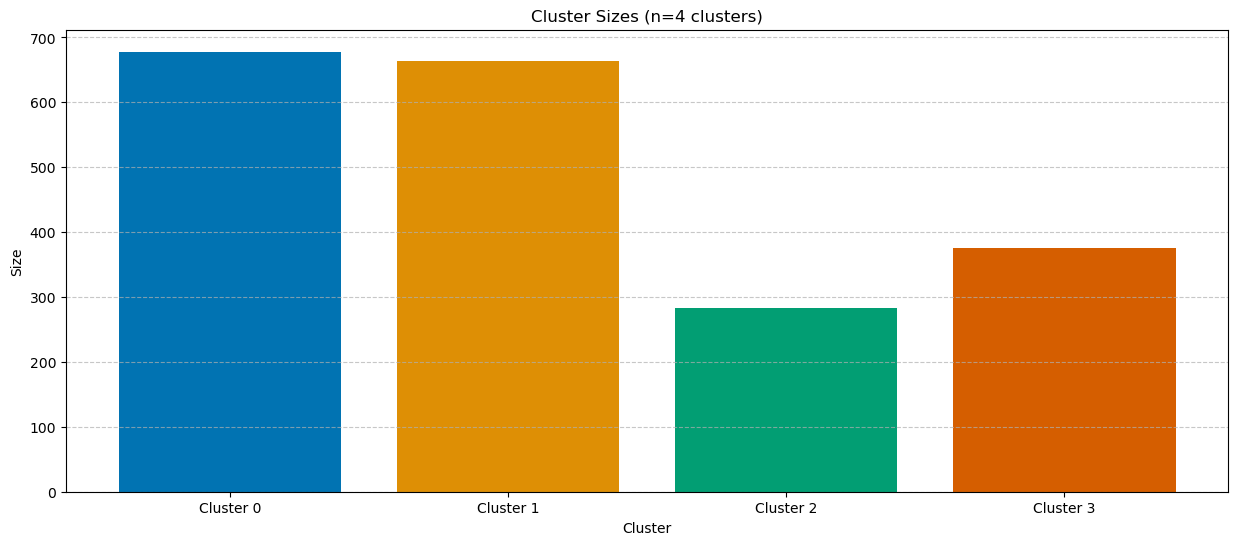

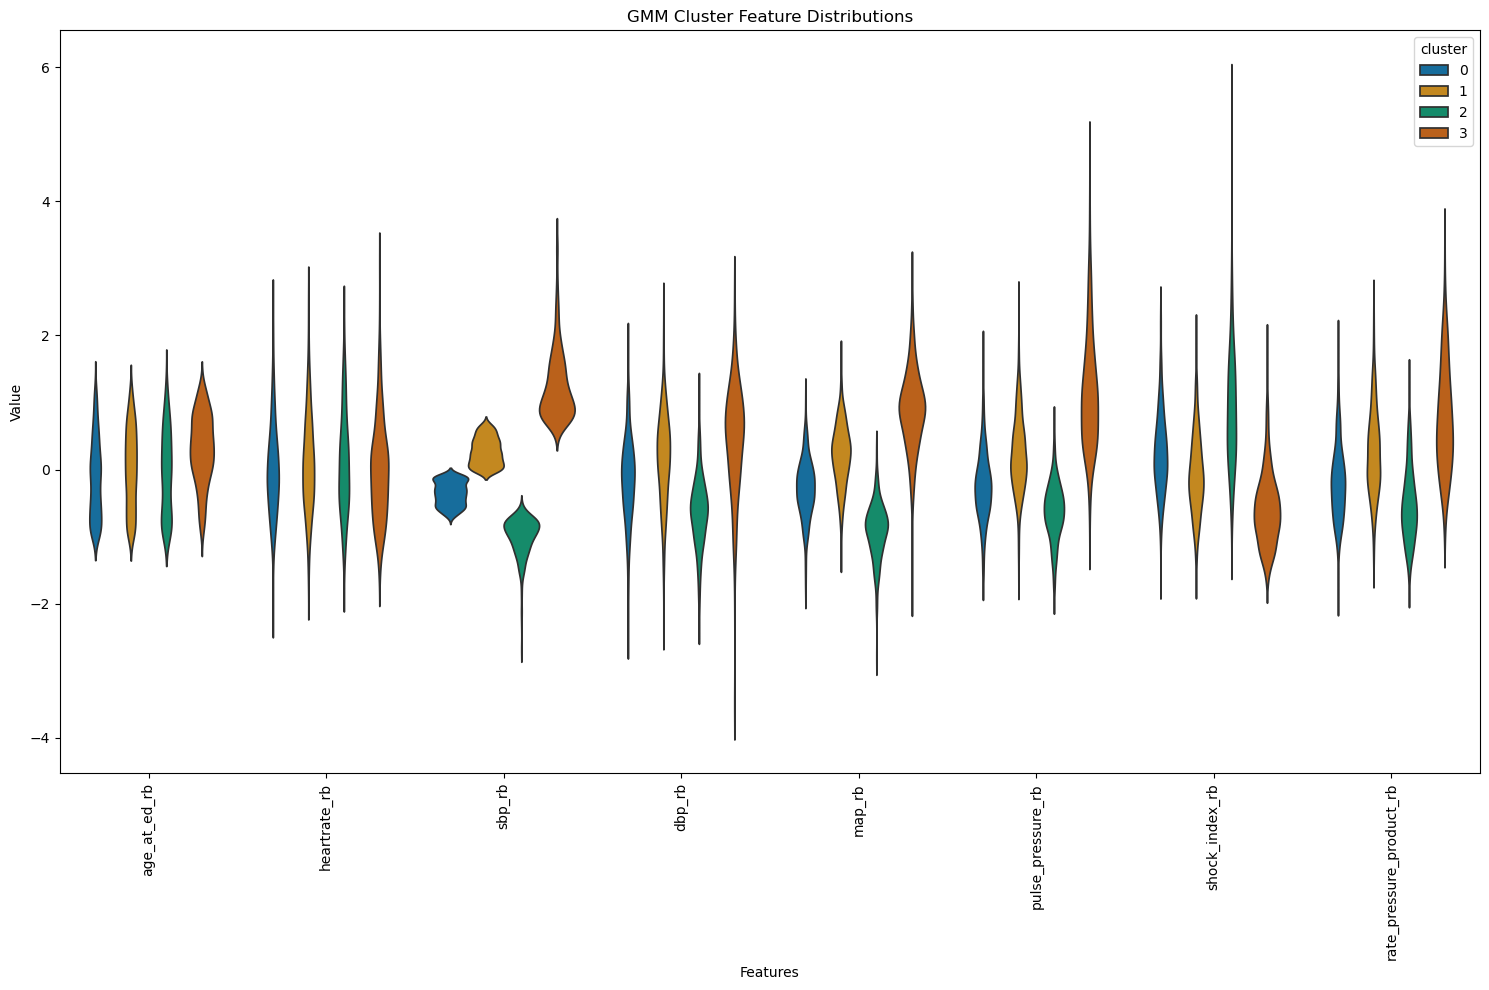

In [6]:
# Examine a specific model in detail (e.g., the best aggressive model with 8 components)
pipeline.examine_model('robust_cv_n_components_4', gmm_cv_robust_transformed)

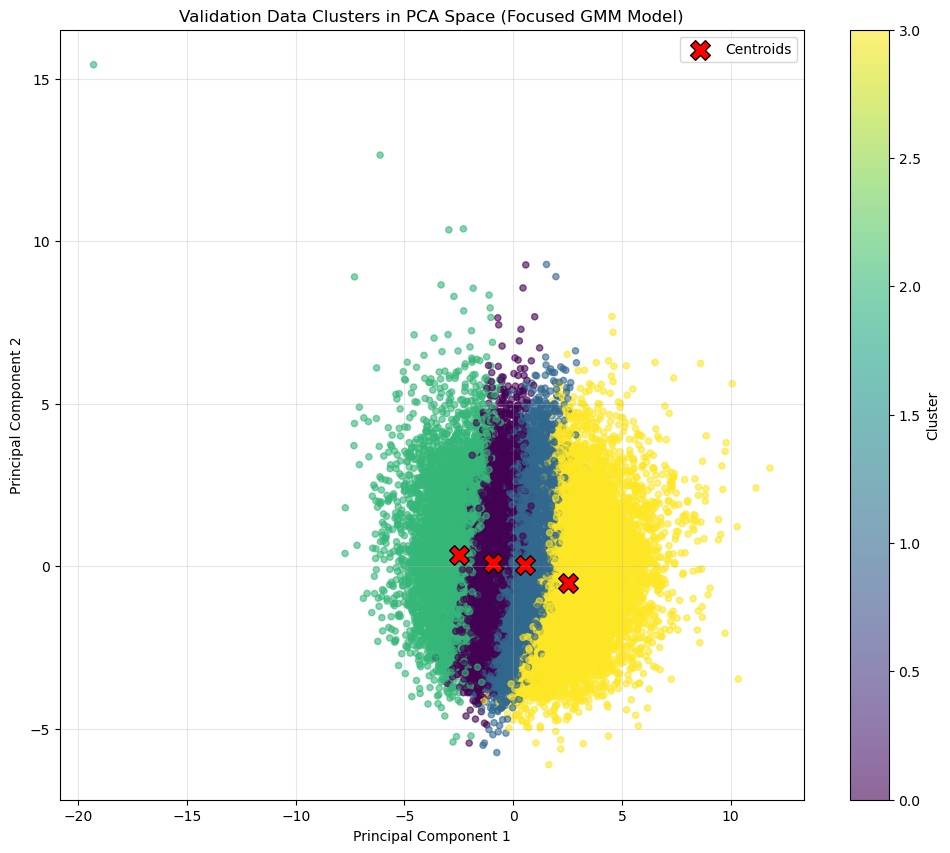

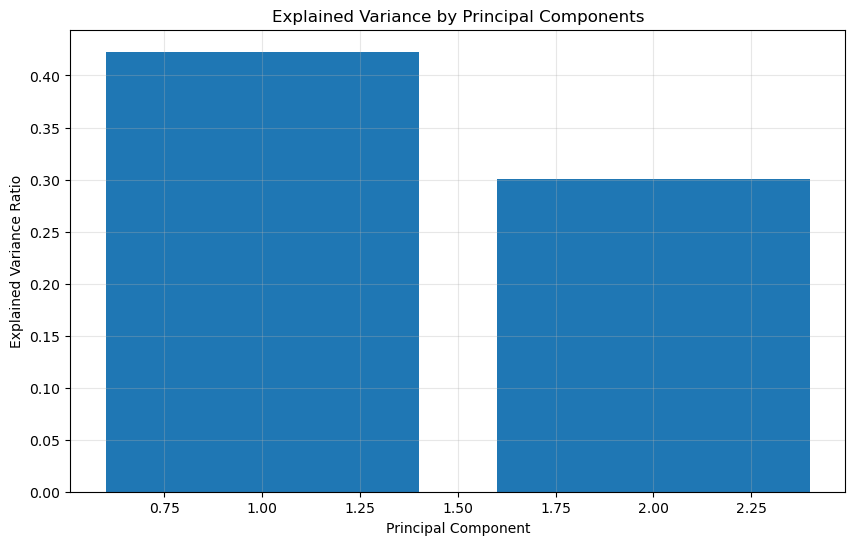

Explained variance ratio: [0.42282265 0.30073135]
Total explained variance by 2 components: 0.72


In [7]:
# Get the model from the registry
focused_model = pipeline.registry.get_model('robust_cv_n_components_4')

# Load validation data - adjust path as needed
validation_data = pd.read_csv('../data/cached/validation_data.csv')

# Transform the validation data
robust_transformer = DataTransformer(validation_data)
val_data_robust_tranformed, _ = robust_transformer.robust_transformer_fit()


# Rerieve focused features (used in the focused GMM model)]
val_cv_robust_tranformed = val_data_robust_tranformed[features_dict['cv_features_robust_transformed']].dropna()

# Predict cluster assignments using the focused model
validation_clusters = focused_model.predict(val_cv_robust_tranformed)

# Create and fit the PCA transformer
pca_transformer = PCATransformer(val_cv_robust_tranformed)
pca_result = pca_transformer.fit_transform(n_components=2)

# Get the model centroids 
centroids = focused_model.model.means_

# Transform centroids to PCA space
centroids_pca = pca_transformer.transform(centroids)

# Create color palette for visualization
colors = sns.color_palette("viridis", len(np.unique(validation_clusters)))

# Create visualization
plt.figure(figsize=(12, 10))

# Plot data points
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                     c=validation_clusters, cmap='viridis', 
                     s=20, alpha=0.6)

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='red', marker='X', s=200, edgecolor='black', label='Centroids')

# Add labels and legend
plt.title('Validation Data Clusters in PCA Space (Focused GMM Model)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)

# Plot explained variance
plt.figure(figsize=(10, 6))
explained_variance = pca_transformer.pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(alpha=0.3)
plt.show()

# Print explained variance information
print(f"Explained variance ratio: {explained_variance}")
print(f"Total explained variance by 2 components: {np.sum(explained_variance):.2f}")

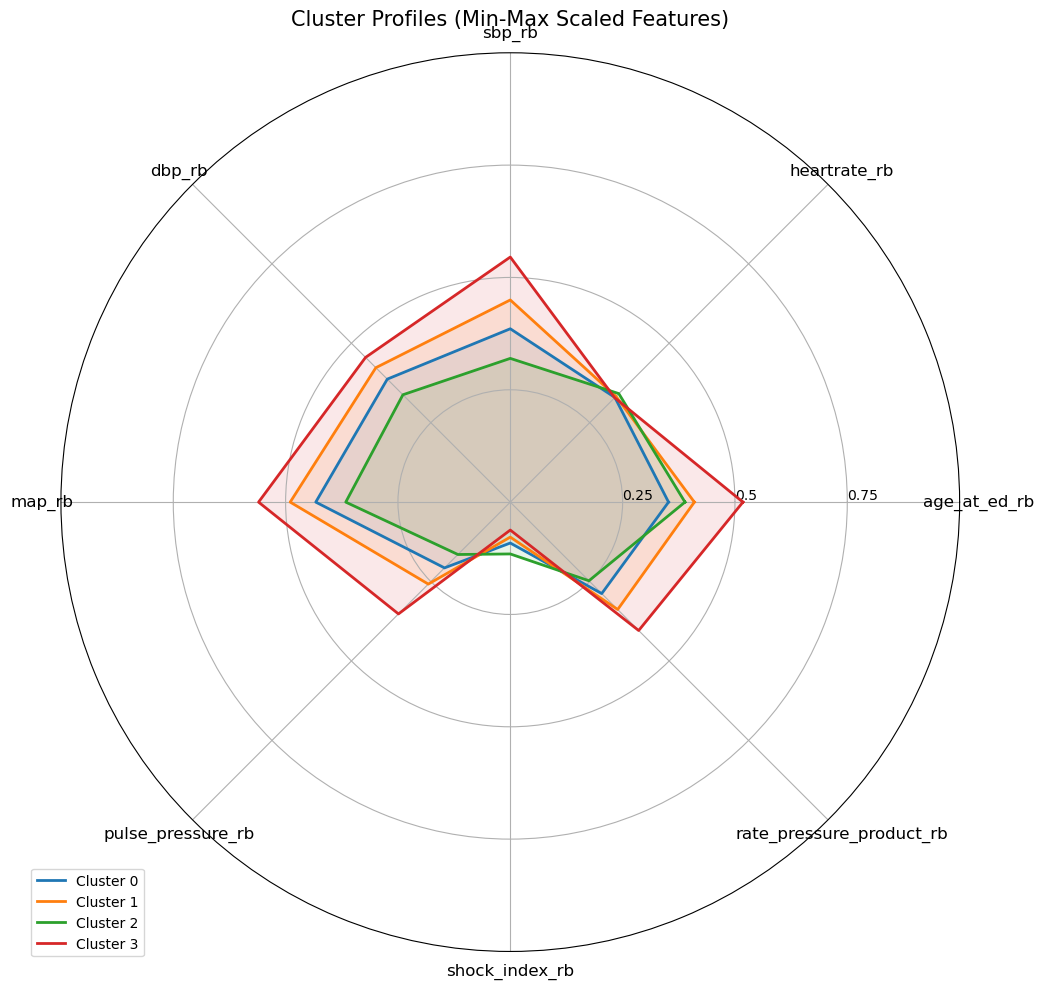

Number of samples in each cluster:
cluster
0    26476
1    27026
2    11661
3    15744
Name: count, dtype: int64

Cluster profiles (mean values):
         age_at_ed_rb  heartrate_rb    sbp_rb    dbp_rb    map_rb  \
cluster                                                             
0            0.352173      0.329334  0.385786  0.387088  0.432900   
1            0.409667      0.332718  0.449892  0.423070  0.489791   
2            0.388764      0.341532  0.319862  0.337897  0.366154   
3            0.517746      0.328528  0.545384  0.455466  0.560201   

         pulse_pressure_rb  shock_index_rb  rate_pressure_product_rb  
cluster                                                               
0                 0.207021        0.091039                  0.287842  
1                 0.258021        0.077894                  0.338053  
2                 0.164877        0.115352                  0.247500  
3                 0.351908        0.062163                  0.404096  


In [8]:
# Evaluation with Radar Charts

# Get the model from the registry
focused_model = pipeline.registry.get_model('robust_cv_n_components_4')

# Load validation data
validation_data = pd.read_csv('../data/cached/validation_data.csv')

# Transform the validation data
robust_transformer = DataTransformer(validation_data)
val_data_robust_transformed, _ = robust_transformer.robust_transformer_fit()

# Retrieve focused features
cv_features = features_dict['cv_features_robust_transformed']
val_cv_robust_transformed = val_data_robust_transformed[cv_features].dropna()

# Predict cluster assignments
validation_clusters = focused_model.predict(val_cv_robust_transformed)

# Add cluster labels to the dataframe
val_cv_robust_transformed['cluster'] = validation_clusters

# Apply Min-Max scaling to normalize features for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
val_cv_scaled = pd.DataFrame(
    scaler.fit_transform(val_cv_robust_transformed[cv_features]),
    columns=cv_features
)
val_cv_scaled['cluster'] = validation_clusters

# Calculate mean values for each feature by cluster
cluster_profiles = val_cv_scaled.groupby('cluster').mean()

fig, ax = radar_chart(cluster_profiles, 'Cluster Profiles (Min-Max Scaled Features)')
plt.tight_layout()
plt.show()

# Print additional statistics
print("Number of samples in each cluster:")
print(val_cv_scaled['cluster'].value_counts().sort_index())

print("\nCluster profiles (mean values):")
print(cluster_profiles)

# Evaluation